# Predicción de decisiones

Para ver el resumen del cuadernillo empezar por el final. \
Puedes ver el proceso de desarrollo y la toma de decisiones a lo largo de todo el cuadernillo.

In [ ]:
#Colab install libraries
!pip install tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.dates as mdates

# MNE for EEG processing
# import mne

# Scikit-learn for machine learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from IPython.display import Image
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import scipy.fft
from tsfresh import extract_features
from tsfresh import select_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !ls /content/drive/MyDrive/tfg/codigo
import sys
sys.path.append('/content/drive/MyDrive/tfg/codigo')
import procesamiento_datos
import constantes

In [ ]:
!python--version

/bin/bash: line 1: python--version: command not found


In [ ]:
# import procesamiento_datos
# import constantes

In [ ]:
# Set a random seed for reproducibility
random_seed = 25
np.random.seed(random_seed)
TASA_MUESTREO = 256 #Hz

## Cargamos los datos

In [ ]:
#Drive
ruta_datos = '/content/drive/My Drive/tfg/datos/Local'
os.chdir(ruta_datos)
archivos_local = os.listdir()
archivos_local.sort()
all_local_data = procesamiento_datos.juntar_datos(".")
single_local_data = procesamiento_datos.leer_datos(archivos_local[0])

os.chdir("../" + constantes.DATA_DIR + constantes.MUSE_DATA)
archivos_muse = os.listdir()
archivos_muse.sort()
single_muse_data = procesamiento_datos.leer_datos(archivos_muse[0])

In [ ]:
print(archivos_local)
print(archivos_muse)


['results0.csv', 'results1.csv', 'results10.csv', 'results11.csv', 'results12.csv', 'results13.csv', 'results14.csv', 'results15.csv', 'results16.csv', 'results17.csv', 'results18.csv', 'results19.csv', 'results4.csv', 'results5.csv', 'results6.csv', 'results7.csv', 'results8.csv', 'results9.csv']
['museData0.csv', 'museData1.csv', 'museData10.csv', 'museData11.csv', 'museData12.csv', 'museData13.csv', 'museData14.csv', 'museData15.csv', 'museData16.csv', 'museData17.csv', 'museData18.csv', 'museData19.csv', 'museData4.csv', 'museData5.csv', 'museData6.csv', 'museData7.csv', 'museData8.csv', 'museData9.csv']


In [ ]:
#Local
# ruta_datos = constantes.DATA_DIR + constantes.LOCAL_DATA
# os.chdir(ruta_datos)
# archivos_local = os.listdir()
# all_local_data = procesamiento_datos.juntar_datos(".")
# single_local_data = procesamiento_datos.leer_datos(archivos_local[0])

# os.chdir("../" + constantes.DATA_DIR + constantes.MUSE_DATA)
# archivos_muse = os.listdir()
# single_muse_data = procesamiento_datos.leer_datos(archivos_muse[0])


In [ ]:
all_local_data.head()

,ID del participante,Trial,Respuesta,Tiempo de inicio,Tiempo de aparición de letras,Tiempo de la pulsación,Tecla elegida,Tiempo de aparición de la letra observada,Letra observada
0,8,0,0,2023-4-23 12:21:36.404,2023-4-23 12:21:41.407,2023-4-23 12:21:43.356,q,2023-4-23 12:21:42.407,d
1,8,0,1,2023-4-23 12:21:44.949,2023-4-23 12:21:46.951,2023-4-23 12:21:49.741,p,2023-4-23 12:21:48.951,m
2,8,0,2,2023-4-23 12:21:50.849,2023-4-23 12:21:52.855,2023-4-23 12:21:56.310,q,2023-4-23 12:21:55.855,t
3,8,0,3,2023-4-23 12:21:57.929,2023-4-23 12:21:59.935,2023-4-23 12:22:2.428,q,2023-4-23 12:22:1.935,t
4,8,0,4,2023-4-23 12:22:3.864,2023-4-23 12:22:5.871,2023-4-23 12:22:12.121,q,2023-4-23 12:22:11.367,t


In [ ]:
all_local_data.describe()

,ID del participante,Trial,Respuesta
count,2579.000000,2579.000000,2579.000000
mean,9.346646,4.618457,7.528887
std,5.790032,2.946942,5.510150
min,0.000000,0.000000,0.000000
25%,5.000000,2.000000,3.000000
50%,9.000000,5.000000,7.000000
75%,15.000000,7.000000,11.000000
max,19.000000,11.000000,30.000000


A priori contamos con un total de 2579 respuestas.

In [ ]:
single_local_data.tail()

,ID del participante,Trial,Respuesta,Tiempo de inicio,Tiempo de aparición de letras,Tiempo de la pulsación,Tecla elegida,Tiempo de aparición de la letra observada,Letra observada
159,0,9,13,2023-5-1 18:39:41.799,2023-5-1 18:39:43.805,2023-5-1 18:39:48.128,q,2023-5-1 18:39:47.805,d
160,0,9,14,2023-5-1 18:39:48.564,2023-5-1 18:39:50.573,2023-5-1 18:39:53.947,p,2023-5-1 18:39:53.573,n
161,0,9,15,2023-5-1 18:39:54.378,2023-5-1 18:39:56.381,2023-5-1 18:39:59.671,q,2023-5-1 18:39:59.381,n
162,0,9,16,2023-5-1 18:40:0.107,2023-5-1 18:40:2.109,2023-5-1 18:40:6.55,p,2023-5-1 18:40:5.613,c
163,0,9,17,2023-5-1 18:40:6.601,2023-5-1 18:40:8.605,2023-5-1 18:40:12.912,q,2023-5-1 18:40:12.605,m


In [ ]:
single_muse_data.head()

,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,Gyro_X,Gyro_Y,Gyro_Z,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery,Elements
0,2023-05-01 18:00:43.602,0.0,0.0,0.885405,0.0,0.0,0.0,0.630772,0.0,0.0,...,5.121613,-0.575714,4.695435,1.0,2.0,1.0,1.0,4.0,65.0,NaN
1,2023-05-01 18:00:43.603,0.0,0.0,0.885405,0.0,0.0,0.0,0.630772,0.0,0.0,...,5.121613,-0.575714,4.695435,1.0,2.0,1.0,1.0,4.0,65.0,NaN
2,2023-05-01 18:00:43.604,0.0,0.0,0.885405,0.0,0.0,0.0,0.630772,0.0,0.0,...,5.121613,-0.575714,4.695435,1.0,2.0,1.0,1.0,4.0,65.0,NaN
3,2023-05-01 18:00:43.604,0.0,0.0,0.885405,0.0,0.0,0.0,0.630772,0.0,0.0,...,5.121613,-0.575714,4.695435,1.0,2.0,1.0,1.0,4.0,65.0,NaN
4,2023-05-01 18:00:43.605,0.0,0.0,0.885405,0.0,0.0,0.0,0.630772,0.0,0.0,...,5.121613,-0.575714,4.695435,1.0,2.0,1.0,1.0,4.0,65.0,NaN


In [ ]:
all_local_data.columns

Index(['ID del participante', 'Trial', 'Respuesta', 'Tiempo de inicio',
       'Tiempo de aparición de letras', 'Tiempo de la pulsación', 'Tecla elegida',
       'Tiempo de aparición de la letra observada', 'Letra observada'],
      dtype='object')

In [ ]:
single_muse_data.columns

Index(['TimeStamp', 'Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10', 'Theta_TP9', 'Theta_AF7',
       'Theta_AF8', 'Theta_TP10', 'Alpha_TP9', 'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10', 'Beta_TP9',
       'Beta_AF7', 'Beta_AF8', 'Beta_TP10', 'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8', 'Gamma_TP10',
       'RAW_TP9', 'RAW_AF7', 'RAW_AF8', 'RAW_TP10', 'AUX_RIGHT', 'Mellow', 'Concentration',
       'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z',
       'HeadBandOn', 'HSI_TP9', 'HSI_AF7', 'HSI_AF8', 'HSI_TP10', 'Battery', 'Elements'],
      dtype='object')

In [ ]:
single_muse_data.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,...,Accelerometer_Z,Gyro_X,Gyro_Y,Gyro_Z,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery
count,597984.0,5.979840e+05,5.979840e+05,597984.0,597984.0,5.979840e+05,5.979840e+05,597984.0,597984.0,5.979840e+05,...,597984.000000,597984.000000,597984.000000,597984.000000,597984.000000,597984.000000,597984.000000,597984.000000,597984.000000,597984.000000
mean,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,0.982134,5.184529,-0.439352,4.849920,0.988217,2.425456,1.035349,1.035349,2.435925,65.362618
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.064695,27.434629,10.545978,18.813299,0.107908,0.818634,0.323724,0.323724,0.825961,6.308147
min,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-1.882080,-244.932709,-238.211060,-231.354828,0.000000,1.000000,1.000000,1.000000,1.000000,50.000000
25%,NaN,3.773297e-01,4.158464e-02,0.0,NaN,4.893955e-02,-3.642102e-02,0.0,NaN,1.561408e-01,...,0.980225,4.874878,-0.643005,4.366455,1.000000,2.000000,1.000000,1.000000,2.000000,60.000000
50%,0.0,7.489185e-01,4.661365e-01,0.0,0.0,4.039428e-01,2.296184e-01,0.0,0.0,3.732305e-01,...,0.985046,5.203857,-0.284119,4.762726,1.000000,2.000000,1.000000,1.000000,2.000000,65.000000
75%,0.0,1.012146e+00,7.744220e-01,0.0,0.0,7.077689e-01,4.816160e-01,0.0,0.0,5.732317e-01,...,0.989624,5.532837,0.029907,5.129089,1.000000,2.000000,1.000000,1.000000,2.000000,70.000000
max,0.0,3.120718e+00,2.938651e+00,0.0,0.0,2.209363e+00,1.987709e+00,0.0,0.0,2.452962e+00,...,1.877625,244.940186,242.151337,230.689392,1.000000,4.000000,4.000000,4.000000,4.000000,75.000000


## Limpieza de datos

In [ ]:
#Resumen del preprocesamiento de datos (incluye algunas partes de las siguientes secciones)
def preprocesamiento(single_muse_data):
    single_muse_data.replace([np.inf, -np.inf], np.nan,).describe()

    raw_data = single_muse_data[['TimeStamp', 'RAW_AF7', 'RAW_AF8']]
    raw_data['TimeStamp'] = (pd.to_datetime(raw_data['TimeStamp']))

    ventanas, y_ventanas = extraer_ventanas_todas(single_muse_data)

    ventanas = np.insert(ventanas, 0, range(len(ventanas)), axis=2)
    ventanas = pd.DataFrame(data=ventanas.reshape(-1, 4), columns=['id', 'TimeStamp', 'RAW_AF7', 'RAW_AF8'])
    ventanas = ventanas.astype({'id':'int32', 'RAW_AF7':'float32', 'RAW_AF8':'float32'})
    y_ventanas = y_ventanas.map({'p':0, 'q':1})

    return ventanas, y_ventanas

Podemos ver que hay muchos valores NaN e infinitos.
Vamos a reemplazar los infinitos por NaN para posteriormente eliminar los NaN

In [ ]:
single_muse_data.replace([np.inf, -np.inf], np.nan,).describe()

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,...,Accelerometer_Z,Gyro_X,Gyro_Y,Gyro_Z,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery
count,397602.0,586466.000000,582696.000000,448616.0,397602.0,586466.000000,582696.000000,448616.0,397602.0,586466.000000,...,597984.000000,597984.000000,597984.000000,597984.000000,597984.000000,597984.000000,597984.000000,597984.000000,597984.000000,597984.000000
mean,0.0,0.694112,0.443715,0.0,0.0,0.400647,0.246206,0.0,0.0,0.391344,...,0.982134,5.184529,-0.439352,4.849920,0.988217,2.425456,1.035349,1.035349,2.435925,65.362618
std,0.0,0.470893,0.462233,0.0,0.0,0.434443,0.363438,0.0,0.0,0.323494,...,0.064695,27.434629,10.545978,18.813299,0.107908,0.818634,0.323724,0.323724,0.825961,6.308147
min,0.0,-0.928962,-1.007072,0.0,0.0,-1.146303,-0.889456,0.0,0.0,-1.151816,...,-1.882080,-244.932709,-238.211060,-231.354828,0.000000,1.000000,1.000000,1.000000,1.000000,50.000000
25%,0.0,0.406367,0.072725,0.0,0.0,0.075552,-0.010488,0.0,0.0,0.172453,...,0.980225,4.874878,-0.643005,4.366455,1.000000,2.000000,1.000000,1.000000,2.000000,60.000000
50%,0.0,0.760223,0.481981,0.0,0.0,0.415792,0.243377,0.0,0.0,0.380374,...,0.985046,5.203857,-0.284119,4.762726,1.000000,2.000000,1.000000,1.000000,2.000000,65.000000
75%,0.0,1.018244,0.781304,0.0,0.0,0.713423,0.490123,0.0,0.0,0.577232,...,0.989624,5.532837,0.029907,5.129089,1.000000,2.000000,1.000000,1.000000,2.000000,70.000000
max,0.0,3.120718,2.938651,0.0,0.0,2.209363,1.987709,0.0,0.0,2.452962,...,1.877625,244.940186,242.151337,230.689392,1.000000,4.000000,4.000000,4.000000,4.000000,75.000000


Vamos a analizar la calidad de los canales según el valor HSI

In [ ]:
sensores = ['HSI_TP9', 'HSI_AF7', 'HSI_AF8', 'HSI_TP10']
media_sensores = []
for file in archivos_muse:
    current_file = procesamiento_datos.leer_datos(file)
    # print("---------------------------------------------")
    # print(current_file[sensores].mean())
    media_sensores.append(current_file[sensores].mean())

/content/drive/MyDrive/tfg/codigo/procesamiento_datos.py:14: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  datos = pd.read_csv(archivo, header='infer')


In [ ]:
np_md = np.array(media_sensores)
print(np_md)
tp9_and_tp10_fail = (np.where((np_md[:,0] > 2) & (np_md[:,3] > 2)))
tp9_or_tp10_fail = (np.where((np_md[:,0] > 2) | (np_md[:,3] > 2)))

[[2.4254562  1.03534877 1.03534877 2.43592471]
 [2.48967401 1.01818431 1.01610252 1.23943284]
 [2.91058938 1.01497221 1.04610004 3.04941428]
 [3.57593602 1.0611215  1.03564702 3.38951445]
 [1.7493025  1.08164162 1.09336802 1.33903661]
 [1.37379431 1.060764   1.03514284 1.37494427]
 [2.5898452  1.08743159 1.03561714 2.80174433]
 [1.36112247 1.03439153 1.0233778  1.64573311]
 [1.2933927  1.07127029 1.0318052  1.29676472]
 [3.68879363 1.2721238  1.26530793 3.678508  ]
 [2.58033505 1.0579797  1.06785932 2.87109059]
 [3.78477455 1.00928811 1.0182898  3.71881669]
 [3.96675971 1.03037438 1.03849978 3.88092448]
 [1.22333991 1.00899828 1.01086677 1.23018413]
 [2.29589169 1.02502425 1.03177292 2.45100491]
 [2.51105104 1.02610825 1.03096665 2.8048116 ]
 [3.6412951  1.15304318 1.0906407  3.63429521]
 [1.30465316 1.00108432 1.00051859 3.44662699]]


In [ ]:
print(tp9_and_tp10_fail[0].size/len(archivos_muse) * 100)
print(tp9_or_tp10_fail[0].size/len(archivos_muse) * 100)

61.111111111111114
72.22222222222221


Podemos ver que los sensores AF7 y AF8 no tienen casi ningún problema a lo largo de todos los experimentos. En cambio TP9 y TP10 suelen presentar más errores o datos de peor calidad ya que un valor HSI igual a 4 significa que los datos no son fiables, un valor de 2 significa que son aceptables y por último 1 significa que son buenos. En el 61% de los archivos la media de la calidad del sensor TP9 y TP10 es superior a 2, en el 72% de los casos, uno de los dos sensores tiene una media superior a 2. Por este motivo, vamos a descartar directamente estos sensores de todo el experimento.

Voy a realizar todo el procedimiento el extracción de características sobre un único dato para agilizar el desarrollo y posteriormente antes de llegar a la fase de selección de modelos y entrenamiento realizaré la manipulación diseñada sobre todo el conjunto de datos.

In [ ]:
raw_data = single_muse_data[['TimeStamp', 'RAW_AF7', 'RAW_AF8', 'HSI_AF7', 'HSI_AF8']]
# raw_data = single_muse_data[['TimeStamp', 'RAW_TP9', 'RAW_AF7', 'RAW_AF8', 'RAW_TP10', 'HSI_TP9', 'HSI_AF7', 'HSI_AF8', 'HSI_TP10']]
# raw_data.concat(single_muse_data.loc[:, "RAW_TP9":"RAW_TP10"])

In [ ]:
raw_data['TimeStamp'] = (pd.to_datetime(raw_data['TimeStamp']))

<ipython-input-25-13e6c4c9d3b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['TimeStamp'] = (pd.to_datetime(raw_data['TimeStamp']))


In [ ]:
print(type(raw_data['TimeStamp'][0]))
raw_data.dtypes

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,0
TimeStamp,datetime64[ns]
RAW_AF7,float64
RAW_AF8,float64
HSI_AF7,float64
HSI_AF8,float64


In [ ]:
raw_data.head()

,TimeStamp,RAW_AF7,RAW_AF8,HSI_AF7,HSI_AF8
0,2023-05-01 18:00:43.602,770.80585,806.26373,1.0,1.0
1,2023-05-01 18:00:43.603,763.95605,768.79120,1.0,1.0
2,2023-05-01 18:00:43.604,791.75824,774.83514,1.0,1.0
3,2023-05-01 18:00:43.604,818.75460,824.39560,1.0,1.0
4,2023-05-01 18:00:43.605,809.89014,847.36260,1.0,1.0


In [ ]:
raw_data.describe()

,TimeStamp,RAW_AF7,RAW_AF8,HSI_AF7,HSI_AF8
count,602494,582600.000000,582516.000000,597984.000000,597984.000000
mean,2023-05-01 18:20:21.530460672,794.763168,796.438397,1.035349,1.035349
min,2023-05-01 18:00:43.602000,0.000000,0.000000,1.000000,1.000000
25%,2023-05-01 18:10:33.294250240,772.820500,771.611700,1.000000,1.000000
50%,2023-05-01 18:20:17.235500032,794.578740,796.190500,1.000000,1.000000
75%,2023-05-01 18:30:12.735749888,815.531100,820.769200,1.000000,1.000000
max,2023-05-01 18:40:21.956000,1642.344400,1650.000000,4.000000,4.000000
std,NaN,28.974514,33.982671,0.323724,0.323724


Vamos a eliminar los filas con valores nulos.

In [ ]:
print(raw_data.isna().sum().sum())
print(raw_data.count())

48892
TimeStamp    602494
RAW_AF7      582600
RAW_AF8      582516
HSI_AF7      597984
HSI_AF8      597984
dtype: int64


Pero en lugar de hacerlo directamente sobre todos los datos del fichero lo haremos más adelante pero solo sobre las ventanas, reduciendo asi la cantidad de datos procesados.

In [ ]:
# raw_data.dropna()

A continuación vamos a extraer una ventana para la primera respuesta. Las ventanas son los datos dentro de un intervalo de tiempo. Para ello tenemos que buscar coger el tiempo de pulsación de los datos 'Local' y dado un tamaño de ventana seleccionar todos las entradas dentro de ese intervalo

Para el tamaño de la ventana vamos a utilizar 'ms_prev' milisegundos previos a la pulsación y 'ms_post' milisegundos posteriores a la pulsación

In [ ]:
def extraer_ventana(single_muse_data, time_stamp, ms_prev, ms_post):
    tiempo_inicio = time_stamp - pd.Timedelta(milliseconds=ms_prev, unit='milliseconds')
    tiempo_fin = time_stamp + pd.Timedelta(milliseconds=ms_post, unit='milliseconds')

    ventana = single_muse_data[(single_muse_data['TimeStamp'] >= tiempo_inicio) & (single_muse_data['TimeStamp'] <= tiempo_fin)]
#     ventana = single_muse_data.where((single_muse_data['TimeStamp'] >= tiempo_inicio))
#     mask = (single_muse_data['TimeStamp'] > tiempo_inicio) & (single_muse_data['TimeStamp'] <= tiempo_fin)
#     ventana = single_muse_data.loc((single_muse_data['TimeStamp'] >= tiempo_inicio))
#     print(single_muse_data['TimeStamp'].dtype)
#     print(type(tiempo_inicio), type(tiempo_fin))
#     print(tiempo_inicio)

    return ventana

In [ ]:
# tiempo_inicio = ts_prueba - pd.Timedelta(800, unit='milliseconds')
# tiempo_fin = ts_prueba + pd.Timedelta(200, unit='milliseconds')

# print(ts_prueba, tiempo_inicio, tiempo_fin)
# # ventana = raw_data[(raw_data['TimeStamp'] >= tiempo_inicio) & (raw_data['TimeStamp'] <= tiempo_fin)]
# # raw_data[(raw_data['TimeStamp'] >= tiempo_inicio) & (raw_data['TimeStamp'] <= tiempo_fin)]
# raw_data.head()

NameError: name 'ts_prueba' is not defined

In [ ]:
  # ventana.head()

In [ ]:
ts_prueba = pd.to_datetime(single_local_data['Tiempo de la pulsación'][0])
ventana_prueba = extraer_ventana(raw_data, ts_prueba, 800, 200)
# print(ts_prueba)
# print(type(ts_prueba))
print(ventana_prueba.head())
# print(ventana_prueba.describe())

                   TimeStamp    RAW_AF7    RAW_AF8  HSI_AF7  HSI_AF8
3479 2023-05-01 18:00:57.044  815.12823  813.91943      1.0      1.0
3480 2023-05-01 18:00:57.045  788.93774  765.97070      1.0      1.0
3481 2023-05-01 18:00:57.047  795.78754  747.43590      1.0      1.0
3482 2023-05-01 18:00:57.048  830.43960  786.52014      1.0      1.0
3483 2023-05-01 18:00:57.049  844.54210  828.82780      1.0      1.0


Vamos a eliminar ahora los datos NaN de la ventana seleccionada.

In [ ]:
print(ventana_prueba.isna().sum().sum())
print(ventana_prueba.count())
ventana_prueba.dropna(inplace= True)
print(ventana_prueba.isna().sum().sum())
print(ventana_prueba.count())

12
TimeStamp    267
RAW_AF7      264
RAW_AF8      264
HSI_AF7      264
HSI_AF8      264
dtype: int64
0
TimeStamp    264
RAW_AF7      264
RAW_AF8      264
HSI_AF7      264
HSI_AF8      264
dtype: int64


<ipython-input-34-4d4a4adef8d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventana_prueba.dropna(inplace= True)


In [ ]:
print(ventana_prueba.columns)

Index(['TimeStamp', 'RAW_AF7', 'RAW_AF8', 'HSI_AF7', 'HSI_AF8'], dtype='object')


## Visualización datos

In [ ]:
def plot_eeg(window, title, idx_channel, ylabel="Tiempo (MM:SS.f)", time_format='%M:%S.%f'):
    # plt.figure(figsize=(12, 8))
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(window['TimeStamp'], window.iloc[:, idx_channel], label=window.columns[idx_channel])
    ax.xaxis.set_major_formatter(mdates.DateFormatter(time_format))

    # Adding titles and labels
    plt.title(title)
    plt.xlabel(ylabel)
    plt.ylabel('Amplitud (µV)')
    plt.legend(loc='upper right')
    plt.show()

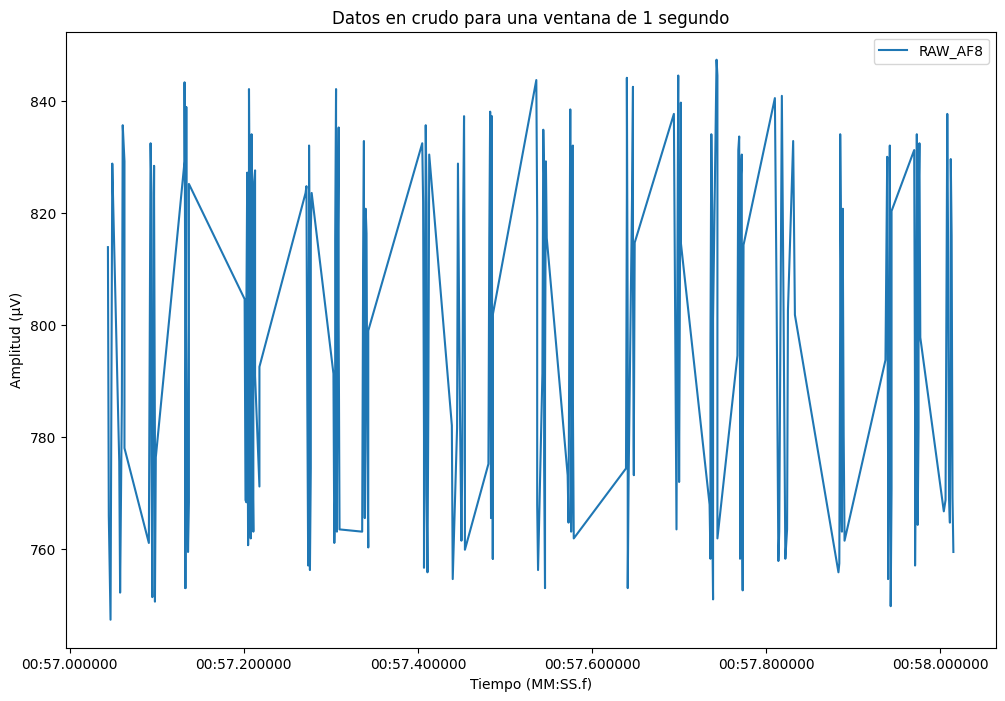

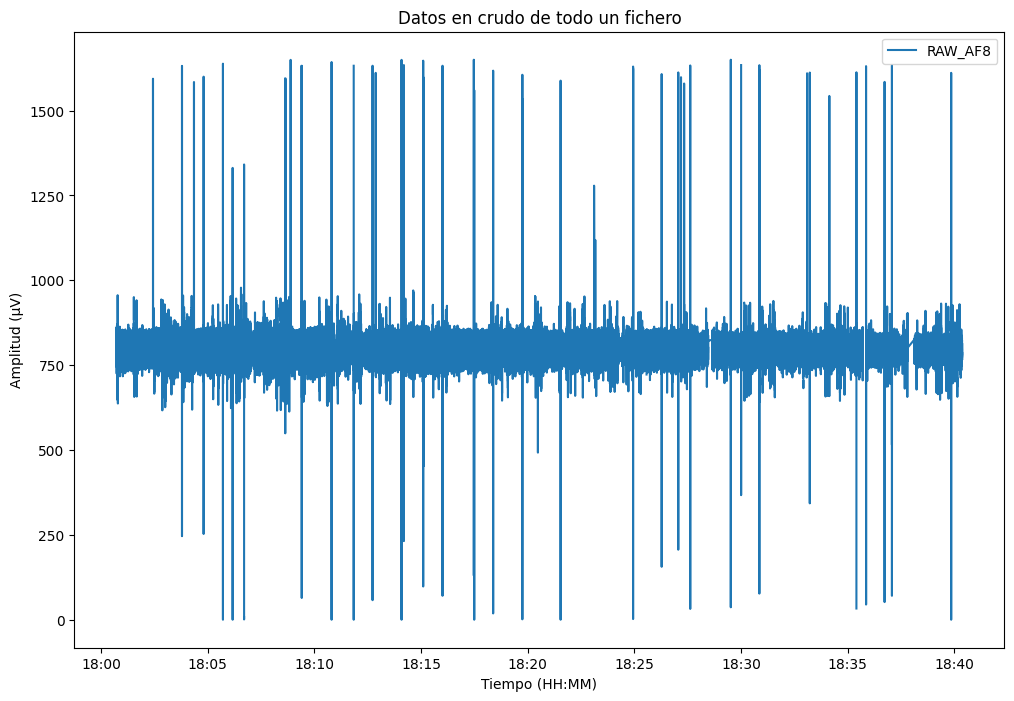

In [ ]:
plot_eeg(ventana_prueba, "Datos en crudo para una ventana de 1 segundo",2)
plot_eeg(raw_data, "Datos en crudo de todo un fichero",2, ylabel="Tiempo (HH:MM)", time_format='%H:%M')

La visualización no es la típica señal que esperamos debido a que nuestros datos solo tienen valores en el intervalo {0-1682}. A continuación podemos ver como se suelen ver este tipo de señales.

De la gráfica de todos los datos en crudo y del describe() del dataset podemos concluir que los datos de mayor interés se encuentra entre 500 y 1000 micro voltios, el resto lo podemos considerar como valores atípicos, outliers y ruido, por ello deberiamos filtrar los datos y descartar dichos valores.

In [ ]:

# Fuente: http://www.chelseajin.com/blog/eeg
Image(url= "https://images.squarespace-cdn.com/content/v1/53fbefb1e4b01a33986e0cfc/1409757437358-63WXI9WHO2HXGX7N4E2A/image-asset.png?format=2500w")

### Transformada de Fourier

Vamos a ver que frecuencias estan presentes en la muestra extraida.

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


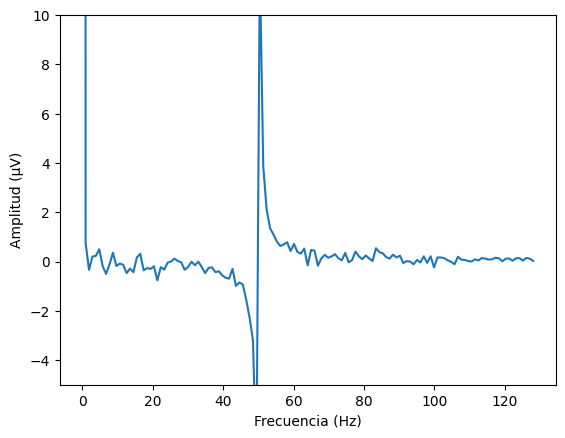

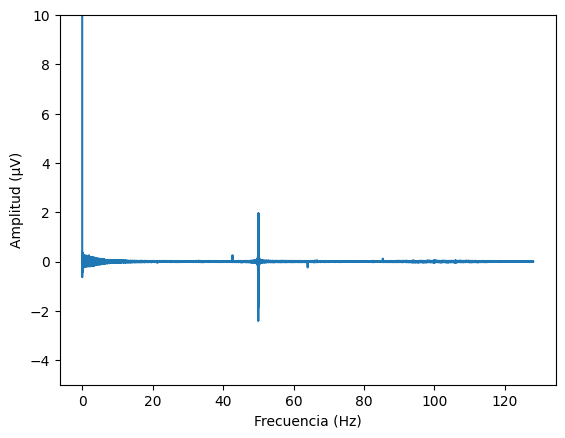

In [ ]:

def plot_fft(data, ylabel="Amplitud "):
    N = data.size
    T = 1/256 #Tasa de muestreo 256Hz
    # x = np.linspace(0.0, N*T, N)
    x = np.linspace(0.0, 1.0/(2.0*T), N//2+1)
    y = np.fft.rfft(data, norm="forward")
    # print(y)
    plt.ylabel("Amplitud (µV)")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylim(-5,10)
    plt.plot(x,y)
    plt.show()

plot_fft(ventana_prueba['RAW_AF7'].dropna())
# plt.cla()
plot_fft(raw_data['RAW_AF7'].dropna())
# print(y)
# N = ventana_prueba['RAW_AF7'].dropna().size
#     T = 1/256 #Tasa de muestreo 256Hz
#     # x = np.linspace(0.0, N*T, N)
#     x = np.linspace(0.0, 1.0/(2.0*T), N//2+1)
#     y = np.fft.rfft(ventana_prueba['RAW_AF7'].dropna(), norm="forward")
#     plt.ylim(-10,30)
#     plt.plot(x,y)
# print(ventana_prueba['RAW_AF7'])
# print(ventana_prueba['RAW_AF7'].describe())
# print(ventana_prueba['RAW_AF7'].dropna().describe())
# print(ventana_prueba['RAW_AF7'].dropna())
# print(ventana_prueba['RAW_AF7'].size)
# print(ventana_prueba['RAW_AF7'].dropna().size)

En las imágenes anteriores podemos ver la Transformada de Fourier Discreta para los datos del primer fichero.
La primera gráfica muestra la transformada para la ventana de 1 segundo situada en la primera respuesta.
La segunda gráfica es la transformada sobre todos los datos del primer fichero.
En ambos casos podemos ver que se detecta perfectamente una frecuencia de 50Hz. Me llama la atención porque precisamente 50Hz es la frecuencia a la que aparece ruido generado por la red eléctrica, aunque en principio los datos ya cuentan con un filtro Notch para solventar este problema. Otro posible motivo sea que al estar los datos en un intervalo {0-1682}, es decir han sido transformado con un valor absoluto o una transformación similar, la transformada de Fourier no es capaz de extraer perfectamente las frecuencias.

Según el creador de Mind Monitor, James Clutterbuck [https://mind-monitor.com/PrivacyPolicy.php ], el filtro Notch no está aplicado en la variable raw_[sensor], sino que se aplica sobre los datos raw para calcular otra variables, por lo tanto es normal que encontremos esta frecuencia en nuestros datos, es ruido.
Fuente: https://mind-monitor.com/forums/viewtopic.php?t=1571  y https://mind-monitor.com/forums/viewtopic.php?t=1919

## Extracción de características

### tsfresh y extracción de ventanas

A continuación vamos a utilizar TsFresh para extraer características de las ventanas de datos.
A partir de este punto comenzaré a realizar este procedimiento para todas las ventanas del primer archivo.

In [ ]:
print(ventana_prueba.shape)
# print(ventana_prueba.columns)
print(ventana_prueba[:5])

(264, 5)
                   TimeStamp    RAW_AF7    RAW_AF8  HSI_AF7  HSI_AF8
3479 2023-05-01 18:00:57.044  815.12823  813.91943      1.0      1.0
3480 2023-05-01 18:00:57.045  788.93774  765.97070      1.0      1.0
3481 2023-05-01 18:00:57.047  795.78754  747.43590      1.0      1.0
3482 2023-05-01 18:00:57.048  830.43960  786.52014      1.0      1.0
3483 2023-05-01 18:00:57.049  844.54210  828.82780      1.0      1.0


Extracción de todas las ventanas y su correspondiente limpieza y preparación para extraer las características

In [ ]:
def extraer_ventanas_todas(single_local_data):
    ventanas = []
    y_ventanas = []

    #Aceptamos una ventana si se han perdido menos del x% de los datos
    tolerancia_valores_perdido = 0.05 # 5%
    tam_ventana = round(TASA_MUESTREO * (1-tolerancia_valores_perdido))

    for idx, x in single_local_data.iterrows():
        time_stamp = pd.to_datetime(single_local_data['Tiempo de la pulsación'][idx])
        ventana = extraer_ventana(raw_data, time_stamp, 800, 200)
        ventana.dropna(inplace= True)

        if (ventana.shape[0] > tam_ventana):
            ventanas.append(ventana[0:tam_ventana])
            y_ventanas.append(single_local_data['Tecla elegida'][idx])

    return (ventanas, y_ventanas)

In [ ]:
# ventanas = []
# y_ventanas = []

# #Aceptamos una ventana si se han perdido menos del x% de los datos
# tolerancia_valores_perdido = 0.05 # 5%
# tam_ventana = round(TASA_MUESTREO * (1-tolerancia_valores_perdido))

# for idx, x in single_local_data.iterrows():
#     time_stamp = pd.to_datetime(single_local_data['Tiempo de la pulsación'][idx])
#     ventana = extraer_ventana(raw_data, time_stamp, 800, 200)
#     ventana.dropna(inplace= True)
#     # print(ventana.shape)

#     if (ventana.shape[0] > tam_ventana):
#         ventanas.append(ventana[0:tam_ventana])
#         # print(single_local_data['Tecla elegida'][idx], idx)
#         y_ventanas.append(single_local_data['Tecla elegida'][idx])
#     # print(idx)

ventanas, y_ventanas = extraer_ventanas_todas(single_local_data)

<ipython-input-41-b5721904a33b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventana.dropna(inplace= True)


In [ ]:
print((ventanas[0]).columns)
ventanas = np.array(ventanas) # Perdemos las etiquetas
# ventanas = pd.DataFrame(ventanas) #No podemos usar Dataframe con dimensionalidad mayor que 3, alternativa -> xarray

Index(['TimeStamp', 'RAW_AF7', 'RAW_AF8', 'HSI_AF7', 'HSI_AF8'], dtype='object')


In [ ]:
print(ventanas.shape)
# print(type(ventanas))
# print(ventanas)

(149, 243, 5)


Para el primer fichero de 164 posibles ventanas hemos acabado con 149. He utilizado un margen de tolerancia del 5% para ventanas que no cuenten con al menos los valores presentes en 1 segundo de la tasa de muestreo, es decir, si la ventana tiene menos de 256*0.95 valores la ventana se descarta. Como consecuencia el número de muestras en todas las ventanas disminiye y por lo tanto las ventanas son de un tamaño ligeramente inferior a 1 segundo.

In [ ]:
single_local_data.columns

Index(['ID del participante', 'Trial', 'Respuesta', 'Tiempo de inicio',
       'Tiempo de aparición de letras', 'Tiempo de la pulsación', 'Tecla elegida',
       'Tiempo de aparición de la letra observada', 'Letra observada'],
      dtype='object')

A continuación voy a añadir una columna id a las ventanas, esto es un requisito de tsfresh. ~~Voy a probar a añadir el mismo id a todas las ventans del primer fichero, en caso de que no sea este el procedimiento correcto~~ añadiré un id distinto a cada ventana y convertiré los datos en un DataFrame, para ello reorgizaré la dimensión para que sea 2D.

In [ ]:
#Añado columna de id a las ventanas
ventanas = np.insert(ventanas, 0, 0, axis=2)

#Modifico el id para cada ventana
for idx, ventana in enumerate(ventanas):
    # ventana[] = np.insert(ventana, 0, idx, axis=1)
    ventana[:,0] = idx
    # if idx == 1:
        # print(ventana)

# ventanas = np.insert(ventanas, 0, 0, axis=2)
# ventanas.shape
# print(ventanas[0])
# ventana_prueba.insert(0, 'id', single_local_data['ID del participante'][0])

In [ ]:
ventanas = pd.DataFrame(data=ventanas.reshape(-1, 6), columns=['id', 'TimeStamp', 'RAW_AF7', 'RAW_AF8', 'HSI_AF7', 'HSI_AF8'])

Elimino las columnas HSI y casteo los datos a su tipo correspondiente para no tener problemas

In [ ]:
ventanas = ventanas.iloc[:,0:4]
ventanas = ventanas.astype({'id':'int32', 'RAW_AF7':'float32', 'RAW_AF8':'float32'})
# ventanas.tail()

También casteo a una Serie de pandas la variable objetivo y transformo los valores 'p' y 'q' a 0 y 1 respectivamente

In [ ]:
y_ventanas = pd.Series(y_ventanas)
y_ventanas = y_ventanas.map({'p':0, 'q':1})
# y_ventanas = y_ventanas.map({'-1':0,})
y_ventanas

,0
0,1
1,0
2,0
3,1
4,0
5,1
6,1
7,1
8,0
9,1


In [ ]:
# Extraer características automáticamente
# ventana_prueba.dtypes
# ventanas.dtypes
# features = extract_features(ventana_prueba, column_id=0, column_sort=1, column_value=2)
features = extract_features(ventanas, column_id="id", column_sort="TimeStamp", column_kind=None, column_value=None)

Feature Extraction: 100%|██████████| 298/298 [00:54<00:00,  5.43it/s]


Hemos obtenido un total de 1566 características para cada ventana de 243 datos, es decir 783 características por canal. Ahora vamos a eliminar las características que hayan devuelvo NaN y las que sean más relevantes según tsfresh

In [ ]:
features.head()

,RAW_AF7__variance_larger_than_standard_deviation,RAW_AF7__has_duplicate_max,RAW_AF7__has_duplicate_min,RAW_AF7__has_duplicate,RAW_AF7__sum_values,RAW_AF7__abs_energy,RAW_AF7__mean_abs_change,RAW_AF7__mean_change,RAW_AF7__mean_second_derivative_central,RAW_AF7__median,...,RAW_AF8__fourier_entropy__bins_5,RAW_AF8__fourier_entropy__bins_10,RAW_AF8__fourier_entropy__bins_100,RAW_AF8__permutation_entropy__dimension_3__tau_1,RAW_AF8__permutation_entropy__dimension_4__tau_1,RAW_AF8__permutation_entropy__dimension_5__tau_1,RAW_AF8__permutation_entropy__dimension_6__tau_1,RAW_AF8__permutation_entropy__dimension_7__tau_1,RAW_AF8__query_similarity_count__query_None__threshold_0.0,RAW_AF8__mean_n_absolute_max__number_of_maxima_7
0,1.0,0.0,0.0,1.0,194393.78125,155663600.0,26.073929,-0.236430,0.028423,800.219788,...,0.08365,0.08365,0.304324,1.675938,2.688774,3.294045,4.068195,4.687757,NaN,844.311890
1,1.0,0.0,1.0,1.0,191290.81250,150802240.0,27.137865,0.131535,0.034274,789.340637,...,0.08365,0.08365,0.611672,1.686207,2.670456,3.463449,4.325148,4.934251,NaN,842.124573
2,1.0,0.0,0.0,1.0,192309.40625,152350320.0,27.967031,-0.261405,0.014211,790.549438,...,0.08365,0.08365,0.839341,1.675992,2.624780,3.306582,4.156852,4.772270,NaN,841.779175
3,1.0,0.0,0.0,1.0,192172.40625,152136944.0,28.131868,0.213120,0.005016,791.758240,...,0.08365,0.08365,0.607383,1.687646,2.653567,3.334649,4.136673,4.782713,NaN,843.218262
4,1.0,0.0,0.0,1.0,192204.25000,152178976.0,27.634033,-0.201465,-0.018391,790.952393,...,0.08365,0.08365,0.536429,1.696871,2.752773,3.536920,4.329207,4.872483,NaN,845.060242


In [ ]:


print(features.shape)
# Eliminar NaN
impute(features)
print(features.shape)

#tecla pulsada
# y = single_local_data['Tecla elegida'][0]
# pd_y= pd.DataFrame(y, index=0)
# features_filtered = select_features(features, y_ventanas)

# features_filtered.shape

/usr/local/lib/python3.10/dist-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['RAW_AF7__query_similarity_count__query_None__threshold_0.0'
 'RAW_AF8__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


(149, 1566)
(149, 1566)


## Modelos

No vamos a mezclar los datos debido a la naturaleza temporal de estos

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, y_ventanas, test_size=0.2, random_state=random_seed, shuffle=False)

In [ ]:
print("Num Datos:", y_ventanas.count())
print("Datos", np.unique(y_ventanas, return_counts=True))
print("Entrenamiento", np.unique(y_train, return_counts=True))
print("Test", np.unique(y_test, return_counts=True))

Num Datos: 149
Datos (array([0, 1]), array([91, 58]))
Entrenamiento (array([0, 1]), array([73, 46]))
Test (array([0, 1]), array([18, 12]))


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

# Evaluación del modelo
def model_metric(y_test, y_pref, print_all = False):
    accuracy = accuracy_score(y_test, y_pref)
    precision = precision_score(y_test, y_pref, average='macro')
    recall = recall_score(y_test, y_pref, average='macro')
    f1 = f1_score(y_test, y_pref, average='macro')

    if print_all:
        print(f"Random Forest Accuracy: {accuracy}")
        print(f"Random Forest Precision: {precision}")
        print(f"Random Forest Recall: {recall}")
        print(f"Random Forest F1-Score: {f1}")

    return accuracy, precision , recall, f1

Vamos a probar GridSearch y Validación cruzada

In [ ]:
from sklearn.model_selection import GridSearchCV

def rf(X_train, X_test, y_train, y_test):
    print("Random Forest ----------------")
    # Definición de los parámetros a probar
    rf_param_grid = {
        'n_estimators': [50, 100, 200, 400],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }

    # Configurar GridSearch con validación cruzada de 5 folds
    grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=random_seed), param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Ajustar el modelo a los datos de entrenamiento
    grid_search.fit(X_train, y_train)

    # Mejor combinación de hiperparámetros
    print(f"Best parameters: {grid_search.best_params_}")

    # Evaluar el modelo con los mejores parámetros
    best_model = grid_search.best_estimator_
    y_pred_best = best_model.predict(X_test)
    # accuracy_best = accuracy_score(y_test, y_pred_best)
    # print(f"Accuracy with best parameters: {accuracy_best}")
    # print(classification_report(y_test, y_pred_best))
    return model_metric(y_test, y_pred_best, True)

In [ ]:
metrics = rf(X_train, X_test, y_train, y_test)

Random Forest ----------------
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Accuracy: 0.6666666666666666
Random Forest Precision: 0.8214285714285714
Random Forest Recall: 0.5833333333333334
Random Forest F1-Score: 0.5341614906832298


In [ ]:
# grid_search.best_score_

In [ ]:
# scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
# print(f"Cross-validation scores: {scores}")
# print(f"Mean accuracy: {scores.mean()}")

### SVM

In [ ]:
from sklearn.svm import SVC

def svc(X_train, X_test, y_train, y_test):
    print("SVM (SVC) ----------------")

    # Definición de los parámetros #288 combinaciones x 5 fold = 1440 modelos
    param_grid = {
        'C': [0.1, 1, 10, 100],                # Valores de regularización
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Diferentes tipos de kernel
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1], # Coeficiente gamma para kernels no lineales
        'degree': [2, 3, 4],                   # Grado del polinomio (solo para kernel 'poly')
    }

    # param_grid = {
    #     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Diferentes tipos de kernel
    # }

    # Definir el modelo SVM (SVC)
    svm_model = SVC()

    # Configurar el GridSearchCV
    grid_search = GridSearchCV(estimator=svm_model,
                               param_grid=param_grid,
                               scoring='accuracy',
                               cv=5,  # Validación cruzada
                               verbose=1,  # Mostrar el progreso
                               n_jobs=-1)  # Usar todos los núcleos disponibles

    # Ajustar el modelo a los datos de entrenamiento (X_train, y_train)
    grid_search.fit(X_train, y_train)

    # Imprimir los mejores hiperparámetros encontrados
    print("Best parameters found: ", grid_search.best_params_)

    # Evaluación del modelo
    best_model = grid_search.best_estimator_
    y_pred_best = best_model.predict(X_test)
    return model_metric(y_test, y_pred_best, True)



In [ ]:
#ParamGrid simplificado (demasiada computación)
metrics = svc(X_train, X_test, y_train, y_test)


SVM (SVC) ----------------
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


In [ ]:
# # Evaluar el modelo usando varias métricas
# print(classification_report(y_test, y_pred_svm))

# # Matriz de confusión
# print(confusion_matrix(y_test, y_pred_svm))
# print(y_pred_rf)


### Xgboost

In [ ]:
from xgboost import XGBClassifier

def xgb(X_train, X_test, y_train, y_test):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1],
        'colsample_bytree': [0.8, 1],
        'gamma': [0, 0.1, 0.2]
    }

    # param_grid = {
    #     'n_estimators': [50]
    # }

    # Crear un modelo XGBoost
    xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

    # Configurar el GridSearchCV
    grid_search = GridSearchCV(estimator=xgb_model,
                               param_grid=param_grid,
                               scoring='accuracy',
                               cv=5,
                               verbose=1,
                               n_jobs=-1)

    # Entrenar el modelo con Grid Search
    grid_search.fit(X_train, y_train)

    # Imprimir los mejores hiperparámetros encontrados
    print("Best parameters found: ", grid_search.best_params_)

    # Evaluación del modelo
    best_model = grid_search.best_estimator_
    y_pred_best = best_model.predict(X_test)
    return model_metric(y_test, y_pred_best, True)

In [ ]:
metrics = xgb(X_train, X_test, y_train, y_test)


Otros modelos.... (pendiente - libreria lightgbm)

## Resumen del desarrollo, estadísticas y conclusiones

A partir de aqui realizaremos el desarrollo sobre el resto de archivos de manera automática hasta obtener todas las métricas.

In [ ]:
#Estadísticas de los datos de cada fichero
balance_datos = pd.DataFrame(columns=['archivo_local', 'archivo_muse', 'n_respuestas_inicial', 'n_respuestas_final', 'balance clase 0(p)', 'balance clase 0(p)(train)', 'balance clase 0(p)(test)'])
#Para un archivo evaluación de las métricas para cada modelo
num_modelos = 4
num_metricas = 4
all_metrics = np.zeros((len(archivos_local), num_modelos, num_metricas))
resultado_metricas = pd.DataFrame(columns=['acurr', 'f1', 'precision', 'support'])

Ejecución de todos los ficheros de principio a fin.

In [ ]:
os.chdir("..")
shuffle_data = False
ms_prev = 800
ms_post = 200


for idx, (local_file,muse_file) in enumerate(zip(archivos_local, archivos_muse)):
    print(muse_file, "--------------------------------------------")
    #Cargar datos
    os.chdir(ruta_datos)
    single_local_data = procesamiento_datos.leer_datos(local_file)
    os.chdir("../Muse")
    single_muse_data = procesamiento_datos.leer_datos(muse_file)
    os.chdir("..")

    # Preprocesamiento de datos
    ventanas, y_ventanas = preprocesamiento(single_muse_data)

    # Extracción de características - tsfresh - todo: psd? , dudas Fourier en relación al rango de los datos 0-1682
    features = extract_features(ventanas, column_id="id", column_sort="TimeStamp", column_kind=None, column_value=None)

    # División de datos train/test
    X_train, X_test, y_train, y_test = train_test_split(features, y_ventanas, test_size=0.2, random_state=random_seed, shuffle=shuffle_data)

    # Entrenamiento y evaluación de los modelos - todo: revisar parámetros de los modelos, leer y escribir en la memoria sobre dichos modelos
    metrics = rf(X_train, X_test, y_train, y_test)
    all_metrics[idx,0] = metrics
    # all_metrics[idx,0,:] = metrics
    metrics = xgb(X_train, X_test, y_train, y_test)
    all_metrics[idx,1] = metrics
    metrics = svc(X_train, X_test, y_train, y_test)
    all_metrics[idx,2] = metrics

    #Estadisticas de datos
    n_respuestas_inicial = single_local_data.count()[2]
    balance_p = np.unique(single_local_data['Tecla elegida'], return_counts=True)[1][0] / n_respuestas
    n_respuestas_final = y_ventanas.count()
    balance_p_train = np.unique(y_train, return_counts=True)[1][0] / n_respuestas
    balance_p_test = np.unique(y_test, return_counts=True)[1][0] / n_respuestas

    # balance_datos_fila = [local_file, muse_file, n_respuestas, balance_p]
    # balance_datos.append(pd.Series(balance_datos_fila, index=balance_datos.columns), ignore_index=True)

    #Estadisticas de métricas
    # balance_datos.append(pd.Series(balance_datos_fila, index=balance_datos.columns), ignore_index=True)



In [ ]:
print(len(archivos_local))
print(len(archivos_muse))
